<a href="https://colab.research.google.com/github/Elieser1945/DeepLearning/blob/main/LSTM_Model_PyTorch_Dengan_ReviewTokoBaju_csv_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📌 LSTM Model PyTorch Dengan ReviewTokoBaju.csv Dataset**

# Install Library

In [44]:
pip install torch pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

# Import Library

In [16]:
import pandas as pd
import re
import torch
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score


# Load dataset

In [17]:
file_path = '/content/ReviewTokoBaju.csv'
data = pd.read_csv(file_path)

display(data)


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


# Pre Processing

In [18]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text


In [19]:
data['cleaned_review'] = data['Review Text'].apply(lambda x: clean_text(str(x)))


In [20]:
data = data.dropna(subset=['cleaned_review'])


In [21]:
X = data['cleaned_review'].values
y = data['Recommended IND'].values


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()


In [24]:
X_train_tensor = torch.tensor(X_train_tfidf, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_tfidf, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


In [25]:
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)


In [26]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)


In [27]:
print(X_train_tfidf.shape, X_test_tfidf.shape)

(18788, 5000) (4698, 5000)


# Bangun Model LSTM

In [28]:
class LSTMModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.lstm = torch.nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Passing input through LSTM layer
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # Get the output of the last timestep
        out = self.fc(out)  # Output to fully connected layer
        return out


In [29]:
import numpy as np

# Define model parameters
input_size = X_train_tensor.shape[1]  # Number of features in input
hidden_size = 64
num_layers = 2
num_classes = len(np.unique(y_train))  # Number of output classes (0 or 1)
learning_rate = 0.001
num_epochs = 20


In [30]:
# Model, loss function, and optimizer
model = LSTMModel(input_size, hidden_size, num_layers, num_classes)
criterion = torch.nn.CrossEntropyLoss()  # For classification
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Latih Model Yang Sudah Dibuat

In [31]:
X_train_tensor = X_train_tensor.unsqueeze(1)  # Add sequence dimension (1)
X_test_tensor = X_test_tensor.unsqueeze(1)    # Add sequence dimension (1)


In [32]:
# Training Loop
train_losses = []
test_losses = []


In [33]:
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")



Epoch [1/20], Train Loss: 0.6490, Test Loss: 0.6465
Epoch [2/20], Train Loss: 0.6459, Test Loss: 0.6435
Epoch [3/20], Train Loss: 0.6428, Test Loss: 0.6404
Epoch [4/20], Train Loss: 0.6396, Test Loss: 0.6373
Epoch [5/20], Train Loss: 0.6365, Test Loss: 0.6342
Epoch [6/20], Train Loss: 0.6333, Test Loss: 0.6310
Epoch [7/20], Train Loss: 0.6301, Test Loss: 0.6277
Epoch [8/20], Train Loss: 0.6268, Test Loss: 0.6244
Epoch [9/20], Train Loss: 0.6234, Test Loss: 0.6210
Epoch [10/20], Train Loss: 0.6199, Test Loss: 0.6175
Epoch [11/20], Train Loss: 0.6164, Test Loss: 0.6139
Epoch [12/20], Train Loss: 0.6127, Test Loss: 0.6102
Epoch [13/20], Train Loss: 0.6089, Test Loss: 0.6063
Epoch [14/20], Train Loss: 0.6050, Test Loss: 0.6023
Epoch [15/20], Train Loss: 0.6009, Test Loss: 0.5981
Epoch [16/20], Train Loss: 0.5966, Test Loss: 0.5937
Epoch [17/20], Train Loss: 0.5922, Test Loss: 0.5892
Epoch [18/20], Train Loss: 0.5875, Test Loss: 0.5845
Epoch [19/20], Train Loss: 0.5827, Test Loss: 0.5795
Ep

# Evaluasi Model

In [36]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predicted_classes = torch.argmax(predictions, dim=1)


In [37]:
accuracy = accuracy_score(y_test, predicted_classes)
precision = precision_score(y_test, predicted_classes, average='weighted')
recall = recall_score(y_test, predicted_classes, average='weighted')
f1 = f1_score(y_test, predicted_classes, average='weighted')
roc_auc = roc_auc_score(y_test, predicted_classes)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
cm = confusion_matrix(y_test, predicted_classes)


In [39]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {roc_auc:.4f}")


Accuracy: 0.8189
Precision: 0.6705
Recall: 0.8189
F1 Score: 0.7373
AUC: 0.5000


# Visulisai

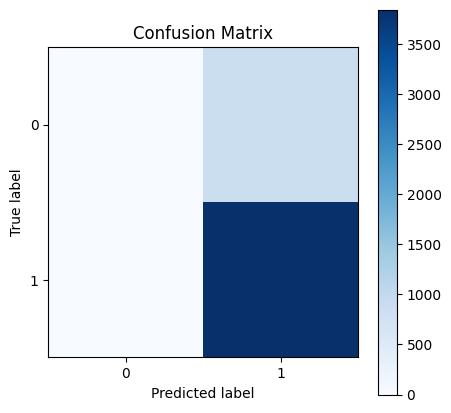

In [42]:
fig, ax = plt.subplots(figsize=(5,5))
cax = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title("Confusion Matrix")
plt.colorbar(cax)  # Add colorbar to the image (cax)
tick_marks = np.arange(2)
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels([0, 1])
ax.set_yticklabels([0, 1])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


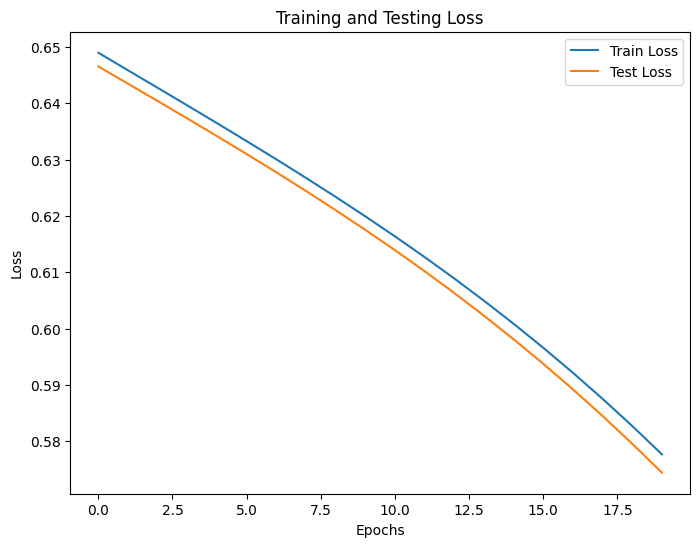

In [43]:
plt.figure(figsize=(8,6))
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()
